In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    background-color: #9467bd;
    padding: 20px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: #ff7f00;
}

h2 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    background-color: #de9ed6;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: #800080;
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    background-color: #756bb1;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: #393b79;
}

body, p {
    font-family: ariel;
    font-size: 18px;
    color: black;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}

</style>
""")

# A Culinary Tour of Language Model Training

Have you ever wondered about the intricate process behind training a large language model? It's not unlike preparing a gourmet meal! Each step requires careful attention and precise execution, from gathering the finest ingredients to mastering cooking techniques. A short display of the process is provided in the following flowchart!

## Flowchart of the training process

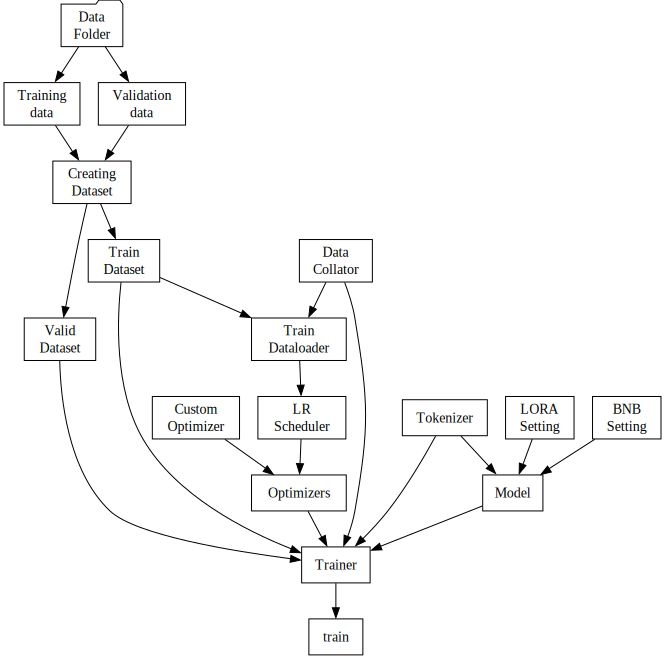

In [22]:
import pydot
from IPython.display import SVG

training_flow = pydot.Dot(graph_type='digraph')

data_folder_node = pydot.Node('Data\nFolder')
data_folder_node.set_shape('folder')
training_flow.add_node(data_folder_node)

training_data_csv_node = pydot.Node('Training\ndata')
training_data_csv_node.set_shape('file')
training_flow.add_node(training_data_csv_node)

validation_data_csv_node = pydot.Node('Validation\ndata')
validation_data_csv_node.set_shape('file')
training_flow.add_node(validation_data_csv_node)

data_folder_train_file_edge = pydot.Edge(data_folder_node, training_data_csv_node)
training_flow.add_edge(data_folder_train_file_edge)

data_folder_valid_file_edge = pydot.Edge(data_folder_node, validation_data_csv_node)
training_flow.add_edge(data_folder_valid_file_edge)

dataset_conversion_node = pydot.Node('Creating\nDataset')
dataset_conversion_node.set_shape('rect')
training_flow.add_node(dataset_conversion_node)

train_csv_dataset_edge = pydot.Edge(training_data_csv_node, dataset_conversion_node)
training_flow.add_edge(train_csv_dataset_edge)

valid_csv_dataset_edge = pydot.Edge(validation_data_csv_node, dataset_conversion_node)
training_flow.add_edge(valid_csv_dataset_edge)

train_dataset_maker_node = pydot.Node('Train\nDataset')
train_dataset_maker_node.set_shape('rect')
training_flow.add_node(train_dataset_maker_node)

valid_dataset_maker_node = pydot.Node('Valid\nDataset')
valid_dataset_maker_node.set_shape('rect')
training_flow.add_node(valid_dataset_maker_node)

train_dataset_edge = pydot.Edge(dataset_conversion_node, train_dataset_maker_node)
training_flow.add_edge(train_dataset_edge)

valid_dataset_edge = pydot.Edge(dataset_conversion_node, valid_dataset_maker_node)
training_flow.add_edge(valid_dataset_edge)

train_dataloader_node = pydot.Node('Train\nDataloader')
train_dataloader_node.set_shape('rect')
training_flow.add_node(train_dataloader_node)

train_data_dataloader_edge = pydot.Edge(train_dataset_maker_node, train_dataloader_node)
training_flow.add_edge(train_data_dataloader_edge)

lr_scheduler_node = pydot.Node('LR\nScheduler')
lr_scheduler_node.set_shape('rect')
training_flow.add_node(lr_scheduler_node)

train_dataloader_to_lr_edge = pydot.Edge(train_dataloader_node, lr_scheduler_node)
training_flow.add_edge(train_dataloader_to_lr_edge)

custom_optimizer_node = pydot.Node('Custom\nOptimizer')
custom_optimizer_node.set_shape('rect')
training_flow.add_node(custom_optimizer_node)

final_optimizer_node = pydot.Node('Optimizers')
final_optimizer_node.set_shape('rect')
training_flow.add_node(final_optimizer_node)

lr_to_final_optimizer_edge = pydot.Edge(lr_scheduler_node, final_optimizer_node)
training_flow.add_edge(lr_to_final_optimizer_edge)

custom_optimizer_to_final_optimizer_edge = pydot.Edge(custom_optimizer_node, final_optimizer_node)
training_flow.add_edge(custom_optimizer_to_final_optimizer_edge)

trainer_node = pydot.Node('Trainer')
trainer_node.set_shape('rect')
training_flow.add_node(trainer_node)

optimizer_to_trainer_edge = pydot.Edge(final_optimizer_node, trainer_node)
training_flow.add_edge(optimizer_to_trainer_edge)

train_dataset_to_trainer_edge = pydot.Edge(train_dataset_maker_node, trainer_node)
training_flow.add_edge(train_dataset_to_trainer_edge)

valid_dataset_to_trainer_edge = pydot.Edge(valid_dataset_maker_node, trainer_node)
training_flow.add_edge(valid_dataset_to_trainer_edge)

data_collator_node = pydot.Node('Data\nCollator')
data_collator_node.set_shape('rect')
training_flow.add_node(data_collator_node)

data_collator_to_train_dataloader_edge = pydot.Edge(data_collator_node, train_dataloader_node)
training_flow.add_edge(data_collator_to_train_dataloader_edge)

data_collator_to_trainer_edge = pydot.Edge(data_collator_node, trainer_node)
training_flow.add_edge(data_collator_to_trainer_edge)

tokenizer_node = pydot.Node('Tokenizer')
tokenizer_node.set_shape('rect')
training_flow.add_node(tokenizer_node)

model_node = pydot.Node('Model')
model_node.set_shape('rect')
training_flow.add_node(model_node)

tokenizer_trainer_edge = pydot.Edge(tokenizer_node, trainer_node)
training_flow.add_edge(tokenizer_trainer_edge)

tokenizer_model_edge = pydot.Edge(tokenizer_node, model_node)
training_flow.add_edge(tokenizer_model_edge)

model_trainer_edge = pydot.Edge(model_node, trainer_node)
training_flow.add_edge(model_trainer_edge)

lora_node = pydot.Node('LORA\nSetting')
lora_node.set_shape('rect')
training_flow.add_node(lora_node)

lora_to_model_edge = pydot.Edge(lora_node, model_node)
training_flow.add_edge(lora_to_model_edge)

bnb_node = pydot.Node('BNB\nSetting')
bnb_node.set_shape('rect')
training_flow.add_node(bnb_node)

bnb_to_model_edge = pydot.Edge(bnb_node, model_node)
training_flow.add_edge(bnb_to_model_edge)

train_node = pydot.Node('train')
train_node.set_shape('rect')
training_flow.add_node(train_node)

trainer_train_edge = pydot.Edge(trainer_node, train_node)
training_flow.add_edge(trainer_train_edge)

training_flow.write_svg('flow.svg')
SVG('flow.svg')

Did you grasp a single thing?

Trust me, I was just as puzzled initially. Perhaps, I still don't comprehend everything in-depth as of now. However, I'll make an attempt to shed light on it based on my current understanding.

If you think I am saying incorrect somewhere, please let me know in the comments.

## Installing required LLM Fine-tuning Libraries for Transformers and Quantization

In [1]:
!pip install trl==0.5.0
!pip install peft==0.4.0
!pip install torch==2.0.0
!pip install wandb==0.15.8
!pip install einops==0.6.1
!pip install pandas==1.5.3
!pip install datasets==2.1.0
!pip install accelerate==0.20.3
!pip install bitsandbytes==0.41.1
!pip install nvidia-ml-py3==7.352.0
!pip install huggingface_hub==0.16.4

!pip install transformers==4.30.2
!pip install transformers[torch]
!pip install transformers[sentencepiece]

from IPython.display import clear_output
clear_output()

Here's a breakdown of why each library is crucial for fine-tuning a large language model (LLM):

**Core Libraries**:

- trl: Transformer Reinforcement Learning (trl) provides essential training and evaluation tools for LLMs with Reinforcement Learning.

- peft: Implements Parameter Efficient Fine-Tuning (PEFT), a technique that improves efficiency and accuracy by fine-tuning a small number of model parameters while freezing most parameters of the pretrained LLM, thereby greatly decreasing the computational and storage costs.

- transformers: The core library for working with transformer models, including BERT, GPT-3, and many others, providing a wide range of pre-trained models and model architectures.

- torch: The core machine learning library, providing tensor computations, automatic differentiation, and deep learning building blocks.

- transformers[torch]: Ensures compatibility between the Transformers library and PyTorch for seamless integration.

- transformers[sentencepiece]: Installs SentencePiece, a powerful text tokenizer often used with transformer models for efficient text segmentation and tokenization.


**Optimization and Efficiency**:

- wandb: Enables logging, visualization, and tracking of experiments for better understanding and optimization of model training.

- einops: Simplifies tensor manipulations and rearrangements, often used in LLM architectures for efficient computations.

- pandas: Facilitates data analysis and manipulation for preparing and preprocessing text datasets effectively.

- datasets: Offers a flexible framework for loading, managing, and transforming different dataset formats, ensuring compatibility with various data sources.

- accelerate: Optimizes training for large models and datasets, leveraging distributed training and hardware acceleration for faster processing.

- bitsandbytes: Enables model quantization, reducing model size and memory footprint for more efficient deployment and inference.

**Hardware Acceleration and Model Deployment**:

- nvidia-ml-py3: Provides tools and libraries for working with NVIDIA GPUs, optimizing performance for LLM training and inference.

- huggingface_hub: Connects to the Hugging Face Hub for accessing pre-trained models, sharing fine-tuned models, and collaborating with the LLM community.

## Importing Required Libraries and Modules

In [2]:
import gc
import os
import random
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 500)

from peft import PeftModel
from peft import LoraConfig
from peft import get_peft_model
from peft import AutoPeftModelForCausalLM
from peft import prepare_model_for_kbit_training

import transformers
from transformers import Trainer
from transformers import AutoTokenizer
from transformers import TrainingArguments
from transformers import BitsAndBytesConfig
from transformers import AutoModelForCausalLM
from transformers import get_linear_schedule_with_warmup
from transformers.trainer_pt_utils import get_parameter_names

import trl
from trl import SFTTrainer
from trl import DataCollatorForCompletionOnlyLM

import huggingface_hub
import bitsandbytes as bnb
from accelerate import Accelerator
from accelerate import DistributedType
from accelerate import notebook_launcher
from accelerate.utils import set_seed as asd

import torch
from torch import nn
from torch.utils.data.dataloader import DataLoader

import wandb
from pynvml import *
from tqdm import tqdm
from typing import List
from datasets import Dataset
from datasets import load_dataset
from dataclasses import dataclass
from IPython.display import display
from IPython.display import FileLink
from kaggle_secrets import UserSecretsClient

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Using Secret Ingredients 🤫

In [3]:
# Fetch Secrets
user_secrets=UserSecretsClient()

# Fetch secret keys
my_secret_hf_api_key_read=user_secrets.get_secret("hf_login")
my_secret_hf_api_key_write=user_secrets.get_secret("hf_model_write")
my_secret_wandb_api_key=user_secrets.get_secret("wandb_api_key")

# Use the secret keys to login
wandb.login(key=my_secret_wandb_api_key)
huggingface_hub.login(token=my_secret_hf_api_key_read, add_to_git_credential=False)
huggingface_hub.login(token=my_secret_hf_api_key_write, add_to_git_credential=False)

wandb: Currently logged in as: adityadawn98. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful
Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


## Helper Functions

### GPU Gauntlet: Unveiling the Power of Your Graphics Colossus

Imagine whipping up a culinary masterpiece in a bustling kitchen. We've gathered the finest ingredients—text and code—and set the recipe—the language model—to simmer. But just like a chef keeps an eye on the oven's temperature, we need tools to monitor our model's training progress and ensure it's cooking up brilliance efficiently.

Enter these vigilant kitchen assistants, crafted in code:

The Attentive Sous-Chef: ```print_gpu_utilization()```

- "How's our workspace looking, chef?"
- This function peeks into the GPU pantry, checking how much memory is being used.
- It's like checking your oven space—ensuring there's room for your creation to rise and avoiding any spills or burnt edges.

The Diligent Head Chef: ```print_summary()```

- "How's the dish progressing? Give me the details!"
- This function delivers a concise report on the training process, like a chef tasting and evaluating a dish.
- It reveals the time spent training, the speed of learning (samples per second), and, of course, the current GPU memory usage.
- It ensures the model is learning effectively and efficiently, preventing any undercooked or overcooked results.

Together, these functions ensure that our language model training is a smooth, well-orchestrated symphony in the kitchen of artificial intelligence. They help us create the most flavorful and intelligent language models possible, ready to serve up delicious insights and conversations. Bon appétit!

In [6]:
try:
    def print_gpu_utilization():
        """
        Prints the current GPU memory usage in MB.

        Uses the NVIDIA Management Library (NVML) to retrieve GPU information.
        """
        nvmlInit()
        handle = nvmlDeviceGetHandleByIndex(0)
        info = nvmlDeviceGetMemoryInfo(handle)
        print(f"GPU memory occupied: {info.used//1024**2} MB.")

    def print_summary(result):
        """
       Prints a summary of training results, including time, samples per second, and GPU memory usage.

       Args:
           result: A dictionary containing training metrics, including 'train_runtime' and 'train_samples_per_second'.

       Raises:
           RuntimeError: If a GPU is not found.
       """
        print(f"Time: {result.metrics['train_runtime']:.2f}")
        print(f"Samples/second: {result.metrics['train_samples_per_second']:.2f}")
        print_gpu_utilization()
except:
    print('GPU not found!')

### Seeding the Future: Planting the Right Randomness for Reproducing Results 

And now, meet the meticulous recipe curator: ```fix_all_seeds()```

Imagine this as the chef who insists on precise measurements and timing for every ingredient.

- "A pinch of randomness here, a dash of data there—but always with precision!"
- This function ensures that every experiment in the kitchen of AI follows a consistent recipe, guaranteeing reproducible results.
- It's like using the same measuring cups and spoons every time you bake a cake—no matter who's in the kitchen, the cake will always turn out delicious.

How does it work?

- Aligning the Kitchen Clocks: It sets the same random seed across multiple libraries (accelerate, Python's random, TRL, NumPy, PyTorch) and environments (CPU and CUDA), ensuring all ingredients blend in perfect harmony.
- Organizing the Pantry: It even controls the order in which ingredients are picked (the Python hash seed), preventing any unexpected surprises in the final dish.

The result?

- Perfectly Replicable Recipes: With fix_all_seeds(), we can confidently share and replicate our LLM experiments, knowing that others can recreate the same delicious results in their own AI kitchens.
- No More "Oops, I Forgot to Write Down That Step" Moments: It eliminates the frustration of unexpected variations due to random chance, ensuring that our language models are always cooking up brilliance, consistently and predictably.

In [7]:
def fix_all_seeds(seed):
    """
    Sets the random seeds for various libraries and environments to ensure reproducibility.

    Args:
    - seed (int): The desired seed value to use for all random number generators.

    Notes:
    - Sets seeds for:
        - accelerate library
        - Python's `random` module
        - The `trl` library
        - NumPy's random number generator
        - PyTorch's CPU and CUDA random number generators
        - The Python hash seed for dictionary ordering
    """
    asd(seed)
    random.seed(seed)
    trl.set_seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

### Data Deluge: Gathering the Fuel for Your Language Learning Machine

Now, let's welcome the skilled forager and pantry organizer: ```fetch_datasets()```

Imagine this as the dedicated kitchen assistant who gathers the freshest ingredients from the market and arranges them neatly in the pantry, ready for the chef's magic touch.

- "What's on the menu today, chef? I'll fetch the finest ingredients!"
- This function gracefully retrieves the training and validation datasets (the flavorful text data that nourishes our language model), ensuring they're accessible and ready to use.

Here's how it orchestrates the pantry:

- Gathering the Goods: It retrieves the paths to the training and validation CSV files, where our text ingredients are stored.
- Preparing for Efficiency: It checks if we need to create iterable datasets, which is like arranging ingredients in easy-to-grab containers to save space and time during cooking.
- Unpacking the Deliveries: It loads the datasets, either as iterable or standard, depending on our efficiency needs.

The result?

- A Well-Stocked Pantry: With ```fetch_datasets()```, the language model kitchen has all the essential ingredients within arm's reach, ready to be transformed into delicious language creations.
- Efficient Workflow: By optimizing dataset handling, it prevents any unnecessary delays or spills, ensuring a smooth and productive cooking experience.

In [8]:
def fetch_datasets(Config_Dataset):
    """
    Loads and returns training and validation datasets from CSV files based on configuration settings.

    Args:
    - Config_Dataset: A configuration object containing the following attributes:
        - TRAIN_CSV_PATH (str): Path to the training CSV file.
        - VALID_CSV_PATH (str): Path to the validation CSV file.
        - CREATE_ITERABLE (bool): Whether to create iterable datasets for memory efficiency.

    Returns:
    - tuple: A tuple containing the loaded training and validation datasets.

    Raises:
    - Exception: Raises any exceptions that occur during dataset loading.
    """
    
    try:
        data_files = {
                        "train": [Config_Dataset.TRAIN_CSV_PATH],
                        "valid": [Config_Dataset.VALID_CSV_PATH]
                    }

        if Config_Dataset.CREATE_ITERABLE:
            dataset = load_dataset('csv', data_files=data_files, streaming=True)
            train_dataset = dataset['train']
            valid_dataset = dataset['valid']

        else:
            dataset = load_dataset('csv', data_files=data_files)
            train_dataset = dataset['train']
            valid_dataset = dataset['valid']

        del Config_Dataset
        gc.collect()

        return train_dataset, valid_dataset

    except Exception as e:
        raise(e)

### Batch Bonanza: Crafting the Ideal Data Packages 

Meet the masterful plate assembler: ```data_loader()```

Imagine this as the skilled maître d' who artfully arranges each dish, ensuring the perfect portion sizes and presentation for every course of the meal.

- "Dinner is served! Each course, meticulously prepared and ready to delight the mind."
- This function takes the carefully gathered ingredients (our text data) and creates a delightful procession of bite-sized samples, perfectly portioned for our language model to savor and learn from.

Here's how it orchestrates the feast:

- Setting the Table: It takes the dataset—our pantry of text ingredients—and prepares to serve it up in an organized manner.
- Crafting the Perfect Bite: It determines the ideal batch size, which is like deciding how many delectable morsels to place on each plate. Too little, and the meal feels incomplete; too much, and it overwhelms the palate.
- Calling for Staff: It enlists the help of multiple worker processes to efficiently fetch and prepare the data, like a team of waiters working in harmony to ensure a seamless dining experience.
- Pinning for Speed: It optimizes data transfer to the GPU, like a maître d' clearing a direct path from the kitchen to the table for swift and smooth delivery.
- Customizing the Presentation: If needed, it allows for a custom collation function, like a chef offering tailored plating options to suit different tastes and preferences.

The result?

- A Symphony of Flavors: With ```data_loader()```, our language model savors each course of text data in well-balanced portions, ensuring optimal learning and digestion.
- Efficient Service, Elevated Experience: By optimizing data preparation and delivery, it prevents any delays or hiccups, creating a seamless and enjoyable learning experience for our model.

In [9]:
def data_loader(
        dataset,
        batch_size,
        num_workers,
        pin_memory,
        collate_fn=None
    ):
    """
    Creates a PyTorch DataLoader for a given dataset with specified parameters.

    Args:
    - dataset (torch.utils.data.Dataset): The dataset to load.
    - batch_size (int): The number of samples to include in each batch.
    - num_workers (int): The number of worker processes to use for loading data.
    - pin_memory (bool): Whether to pin memory for faster data transfer to GPU.
    - collate_fn (callable, optional): A function to customize the collation of samples into batches. Defaults to None.

    Returns:
    - torch.utils.data.DataLoader: The created DataLoader.
    """
    return DataLoader(
                dataset=dataset,
                batch_size=batch_size,
                num_workers=num_workers,
                pin_memory=pin_memory,
                collate_fn=collate_fn
            )

In [10]:
def get_model_config(peft_model_id: str):
    return LoraConfig.from_pretrained(peft_model_id)

### Breaking Down the Language Barrier: Introducing the Word Maestro

Now, let's welcome the master knifesmith and flavor architect: ```get_tokenizer()```

Imagine this as the skilled artisan who crafts the perfect cutlery for our language model, ensuring each ingredient's distinct flavors are precisely cut, seasoned, and ready to blend harmoniously.

- "Every ingredient deserves a perfect cut, every nuance a sharpened edge."
- This function retrieves the essential tokenizer—the tool that dissects language into its fundamental building blocks, much like a chef's knife slicing and dicing vegetables for a balanced dish.

Here's how it shapes the language experience:

- Visiting the Hugging Face Pantry: It journeys to the Hugging Face Hub, a vast repository of pre-trained models and tokenizers, like a chef exploring a bustling market for the finest tools of the trade.
- Selecting the Right Knife: It chooses the tokenizer that matches our chosen pre-trained model, understanding that different cuisines (models) require different precision instruments.
- Customizing the Cut: It empowers us to configure the tokenizer's behavior, like adjusting the blade's sharpness or angle for specific ingredients. We can choose whether to apply padding or truncation.
- Handling Special Ingredients: It ensures that any special tokens, like those marking the end of sentences or filling extra space, are appropriately handled, like a chef carefully adjusting cooking times for delicate herbs or spices.

The result?

- Precision and Clarity: With ```get_tokenizer()```, our language model savors each ingredient (word or phrase) in its most refined form, understanding their distinct flavors and relationships, leading to richer and more nuanced language creations.
- Flexibility and Control: By allowing us to customize the tokenizer's behavior, we can tailor the learning process to suit different language styles and preferences, much like a chef adapting a recipe to accommodate different tastes or dietary needs.

In [11]:
def get_tokenizer(MODEL_ID,Config_Tokenizer):
    """
    Loads a tokenizer for a pre-trained model from the Hugging Face Hub, applying specified configurations.

    Args:
    - MODEL_ID (str): The identifier of the pre-trained model to load the tokenizer for.
    - Config_Tokenizer: A configuration object containing settings for loading the tokenizer, with attributes:
        - PADDING (bool): Whether to apply padding to inputs.
        - TRUNCATION (bool): Whether to apply truncation to inputs.
        - USE_AUTH_TOKEN (bool): Whether to use an authentication token for model loading.
        - FORCE_DOWNLOAD (bool): Whether to force a fresh download of the tokenizer.
        - RESUME_DOWNLOAD (bool): Whether to resume a previously interrupted download.
        - TRUST_REMOTE_CODE (bool): Whether to trust remote code when loading the tokenizer.
        - ADD_SPECIAL_TOKENS (bool): Whether to add special tokens to the vocabulary.

    Returns:
    - transformers.AutoTokenizer: The loaded and configured tokenizer.

    Raises:
    - Exception: Raises any exceptions that occur during tokenizer loading.
    """
    try:
        # Fetch Tokenizer
        tokenizer = AutoTokenizer.from_pretrained(
                        MODEL_ID,
                        padding=Config_Tokenizer.PADDING,
                        truncation=Config_Tokenizer.TRUNCATION,
                        use_auth_token=Config_Tokenizer.USE_AUTH_TOKEN,
                        force_download=Config_Tokenizer.FORCE_DOWNLOAD,
                        resume_download=Config_Tokenizer.RESUME_DOWNLOAD,
                        trust_remote_code=Config_Tokenizer.TRUST_REMOTE_CODE,
                        add_special_tokens=Config_Tokenizer.ADD_SPECIAL_TOKENS
                    )

        # Configure EOS-Tokens
        if tokenizer.eos_token is None:
            tokenizer.eos_token = '[EOS]'

        # Configure PAD-Tokens
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token

        return tokenizer

    except Exception as e:
        raise(e)

### Painting with Bits: Mastering Quantization for Efficient Computation

Now, let's meet the masterful alchemist and flavor preserver: ```config_bnb()```

Imagine this as the chef who carefully crafts delicate reductions and essences, capturing the vibrant flavors of our ingredients while preserving them in a more concentrated form.

- "Concentrating the essence, preserving the flavor, ensuring every nuance endures."
- This function configures quantization, a technique that distills our model's knowledge into a smaller, more efficient format, much like a chef reducing a sauce to intensify its flavors while using fewer resources.

Here's how it brews the magic:

- Setting the Precision: It determines the level of quantization, like adjusting the intensity of a reduction. We can choose to load the model in 4-bit precision, a smaller size that often retains much of the flavor while using less storage and energy.
- Selecting the Technique: It chooses the specific quantization method, like selecting the perfect cooking vessel for a reduction. Different techniques, such as "nf4" or others, can yield varying results, depending on the model and desired outcomes.
- Choosing the Compute Type: It determines the underlying data type used during computations, like adjusting the heat level for a reduction. Different compute dtypes, like "torch.bfloat16", can balance precision and efficiency, ensuring both accuracy and resource conservation.
- Double Quantization: It offers the option of double quantization, like a chef performing a multi-step reduction for the most concentrated essence. This technique can further reduce model size and accelerate performance, but it requires careful attention to detail.

The result?

- Efficiency and Preservation: With ```config_bnb()```, our language model's knowledge is distilled into a more compact and efficient form, allowing it to run faster and consume less memory, like a reduced sauce that packs a flavorful punch without taking up too much space on the plate.
- Flavor Control: By adjusting quantization settings, we can fine-tune the balance between model size, speed, and accuracy, much like a chef carefully adjusting the intensity of a reduction to achieve the perfect balance of flavors.

In [12]:
def config_bnb(Config_BNB):
    """
    Creates a BitsAndBytesConfig object for quantization settings, based on provided configuration values.

    Args:
    - Config_BNB: A configuration object containing quantization settings, with attributes:
        - LOAD_IN_4BIT (bool): Whether to load the model in 4-bit precision.
        - BNB_4BIT_QUANT_TYPE (str): The type of 4-bit quantization to use (e.g., "nf4").
        - BNB_4BIT_COMPUTE_DTYPE (str): The compute dtype to use for 4-bit quantization (e.g., "torch.bfloat16").
        - BNB_4BIT_USE_DOUBLE_QUANT (bool): Whether to use double quantization for 4-bit precision.

    Returns:
    - The created BitsAndBytesConfig object.

    Raises:
    - Exception: Raises any exceptions that occur during configuration creation.
    """
    
    # Create BitsAndBytes Configurations
    try:
        return BitsAndBytesConfig(
                    load_in_4bit=Config_BNB.LOAD_IN_4BIT,
                    bnb_4bit_quant_type=Config_BNB.BNB_4BIT_QUANT_TYPE,
                    bnb_4bit_compute_dtype=Config_BNB.BNB_4BIT_COMPUTE_DTYPE,
                    bnb_4bit_use_double_quant=Config_BNB.BNB_4BIT_USE_DOUBLE_QUANT
                )
    except Exception as e:
        raise(e)

### Lora's Low-Rank Legacy: Building a Leaner, Meaner Language Model

Now, let's introduce the master architect and flavor sculptor: ```config_lora()```

Imagine this as the chef who masterfully designs intricate structures and textures within a dish, ensuring that each flavor is not only present but also arranged in a way that enhances its impact and creates a harmonious symphony on the palate.

- "Every ingredient has a role to play, a note to contribute. Let's orchestrate a masterpiece of flavor and efficiency."
- This function configures LORA, a technique that optimizes our model's structure for better performance and efficiency, much like a chef carefully layering flavors and textures to create a dish that is both delicious and satisfying without being overwhelming.

Here's how it shapes the culinary experience:

- Setting the Rank: It determines the level of compression applied to the model's weight matrices, like adjusting the density of a cake batter. A lower rank often leads to a more compact and efficient model, while a higher rank can maintain more detail and accuracy, depending on the recipe's needs.
- Adding Bias: It decides whether to incorporate bias terms into the low-rank approximation, like a chef deciding whether to add a pinch of salt to enhance the flavors of a dish. Bias can improve model performance in certain cases, but it needs to be balanced carefully.
- Specifying the Task: It aligns model configuration with the specific culinary task at hand, like a chef choosing the right tools and techniques for baking versus sautéing. Different tasks, such as "CAUSAL_LM" or others, may require different LORA settings for optimal results.
- Regularizing with Alpha: It introduces a regularization parameter to prevent overfitting, much like a chef adding a touch of lemon juice to prevent a cream sauce from becoming too heavy. This helps the model generalize better to new data, ensuring it doesn't become too reliant on the training examples.
- Applying Dropout: It removes connections between neurons during training, like a chef experimenting with different combinations of ingredients to discover surprising flavor pairings. This technique can help prevent overfitting and encourage the model to learn more robust representations of language.

The result?

- Optimized Structure, Enhanced Flavor: With ```config_lora()```, our language model becomes more efficient and capable of handling complex tasks without sacrificing the richness of language understanding. It's like creating a dish that is both light and flavorful, satisfying without being overly indulgent.
- Fine-Tuning for Balance: By adjusting LORA configuration, we can control the trade-offs between accuracy, model size, and computational cost, finding the perfect balance that suits our specific needs and resources. It's like a chef adjusting the heat, the timing, and the proportions of ingredients to create a dish that is perfectly cooked and balanced in flavor

In [13]:
def config_lora(Config_LORA):
    """
    Creates a LoraConfig object for LORA-specific model configuration, based on provided values.

    Args:
    - Config_LORA: A configuration object containing LORA settings, with attributes:
        - LORA_R (int): The rank of the low-rank approximation.
        - LORA_BIAS (str): Bias to include in the low-rank approximation.
        - TASK_TYPE (str): The type of task the model is being used for (e.g., "CAUSAL_LM").
        - LORA_ALPHA (float): The LORA alpha parameter for regularization.
        - LORA_DROPOUT (float): The dropout probability to apply in LORA layers.

    Returns:
    - The created LoraConfig object.

    Raises:
    - Exception: Raises any exceptions that occur during configuration creation.
    """
    try:
        return LoraConfig(
                    r=Config_LORA.LORA_R,
                    bias=Config_LORA.LORA_BIAS,
                    task_type=Config_LORA.TASK_TYPE,
                    lora_alpha=Config_LORA.LORA_ALPHA,
                    lora_dropout=Config_LORA.LORA_DROPOUT,
                )
    except Exception as e:
        raise(e)

### Make the Model Monster: Crafting a Quantized Language Leviathan

Now, let's welcome the grand maître d' and master weaver: ```make_model()```

Imagine this as the head chef who artfully assembles and aligns every element of the kitchen, ensuring that the finest ingredients, specialized techniques, and precision tools work in perfect harmony to create a symphony of flavors and efficiency.

- "Every detail matters, every ingredient has its place. Let's orchestrate a culinary masterpiece that delights the mind and respects our resources."
- This function constructs the heart of our language model, carefully selecting, configuring, and optimizing its components for peak performance and resource consciousness, much like a chef designing a menu that balances bold flavors with sustainable practices.

Here's how it conducts the culinary ballet:

- Gathering the Essential Ingredients: It fetches a PEFT-enabled model from the Hugging Face Hub, a treasure trove of pre-trained culinary knowledge, like a chef sourcing exquisite ingredients from trusted vendors.
- Quantizing for Flavor Concentration: It applies quantization techniques, carefully reducing the model's size and resource requirements without sacrificing too much of its expressiveness, much like a chef intensifying flavors through reductions and essences.
- Managing the Kitchen Space: It optimizes memory usage across multiple GPUs, ensuring efficient use of resources, like a chef streamlining workflows and optimizing storage to accommodate elaborate dishes within a bustling kitchen.
- Preparing for k-bit Training: It further refines the model for k-bit training, a specialized technique that unlocks even greater efficiency, like a chef experimenting with innovative cooking methods to achieve new levels of resourcefulness.
- Infusing with PEFT Magic: It incorporates PEFT, a powerful approach that enhances model performance and adaptability, much like a chef adding secret spices and innovative techniques to create dishes that surprise and delight.
- Assigning to the Right Oven: It places the meticulously crafted model onto the designated device (GPU or CPU), like a chef choosing the perfect oven to ensure optimal cooking conditions.

The result?

- A Masterpiece of Intelligence and Efficiency: With ```make_model()```, we have a language model that is not only capable of generating delicious language but also able to do so while respecting our computational resources, like a chef crafting exquisite meals that both captivate the senses and embrace sustainability.
- Balance and Harmony: This function exemplifies the artful balance between language understanding, model efficiency, and resource management, ensuring that our language model can continue to learn and evolve without overwhelming our kitchen's capacity.

In [14]:
def make_model(
        N_GPUS,
        DEVICE,
        MODEL_ID,
        tokenizer,
        MAX_MEMORY,
        BNB_Config,
        PEFT_Config,
        process_index,
        sequence_max_length,
        torch_dtype_from_bnb_config
    ):
    """
    Loads a PEFT-enabled model from the Hugging Face Hub, applies quantization and memory optimizations,and prepares it for k-bit training.

    Args:
    - N_GPUS (int): The number of available GPUs.
    - DEVICE (str): The device to load the model onto (e.g., "cuda" or "cpu").
    - MODEL_ID (str): The identifier of the pre-trained model to load.
    - tokenizer: The tokenizer associated with the pre-trained model.
    - MAX_MEMORY (int): The maximum memory per GPU to allocate for the model.
    - BNB_Config: A BitsAndBytesConfig object for quantization settings.
    - PEFT_Config: A configuration object for PEFT settings (details unspecified).
    - process_index (int): The index of the current process in distributed training.
    - sequence_max_length (int): The maximum sequence length to accommodate.
    - torch_dtype_from_bnb_config (torch.dtype): The torch dtype to use based on quantization settings.

    Returns:
    - AutoPeftModelForCausalLM: The loaded, quantized, optimized, and PEFT-enabled model.

    Raises:
    - Exception: Raises any exceptions that occur during model loading or configuration.
    """
    try:
        model = AutoPeftModelForCausalLM.from_pretrained(
                    MODEL_ID,
                    trust_remote_code=True,
                    device_map="auto", # {"": process_index},
                    quantization_config=BNB_Config,
                    torch_dtype=torch_dtype_from_bnb_config,
                    max_memory = {i: MAX_MEMORY for i in range(N_GPUS)}
                )
        model.config.use_cache = False
        model.gradient_checkpointing_enable()
        try:
            model.resize_token_embeddings(len(tokenizer))
        except:
            model.resize_token_embeddings(sequence_max_length)
        model = prepare_model_for_kbit_training(model)
        model = get_peft_model(model, PEFT_Config)
        model.to(DEVICE)
        return model
    except Exception as e:
        raise(e)

### Fueling the Machine: Tailoring the Optimizer for Peak Performance

Now, let's welcome the seasoned sous chef and flavor guide: ```Create_Optimizer()```

Imagine this as the experienced sous chef who carefully crafts the perfect blend of seasonings and techniques to guide the learning process, ensuring that our language model evolves towards a harmonious balance of flavors, textures, and efficiency, much like a baker adjusting the leavening agents and baking time to create a cake that is both light and flavorful.

- "Every ingredient needs a guiding hand, every flavor a direction to blossom. Let's create the perfect conditions for growth and refinement."
- This function tailors an optimizer, a tool that governs how our model learns from experience, adjusting its internal parameters to capture the nuances of language and achieve its full potential.

Here's how it orchestrates the learning journey:

- Understanding the Ingredients: It carefully examines the model's architecture, identifying the distinct components that require different levels of guidance, like a baker adjusting the amount of sugar and flour based on the type of cake being made.
- Applying Weight Decay: It introduces a technique that prevents certain model components from becoming too dominant, ensuring a balanced flavor profile, like a chef using a light touch with potent spices to avoid overpowering a dish.
- Selecting the AdamW Method: It chooses the AdamW optimizer, a proven approach for effectively guiding model learning, like a baker relying on a trusted recipe for a consistently delicious cake.
- Setting the Learning Pace: It establishes the learning rate, controlling the speed at which the model adjusts its knowledge, much like a baker regulating the oven temperature to achieve a perfect bake.
- Incorporating Quantization: It integrates quantization awareness, ensuring that the optimizer works harmoniously with the model's compressed format, like a baker adjusting the recipe for a smaller cake pan without sacrificing taste.
- Enhancing Precision (if available): It offers the option to further refine quantization within the optimizer itself, potentially unlocking even greater efficiency, like a baker experimenting with different types of flour to achieve a finer crumb.

The result?

- Steady Growth and Refinement: With ```Create_Optimizer()```, our language model embarks on a focused learning journey, guided by a meticulously crafted plan that balances flavor development with resource awareness, like a baker carefully nurturing a sourdough starter to achieve both complexity and efficiency.
- Tailored Guidance for Each Ingredient: This function ensures that each component of our model receives the optimal level of attention, preventing any single flavor from overshadowing the others and fostering a symphony of language understanding that is both rich and refined.

In [15]:
def Create_Optimizer(
        model,
        optim_bits,
        adam_beta1,
        adam_beta2,
        adam_epsilon,
        weight_decay,
        learning_rate
    ):
    """
    Creates an AdamW optimizer with BitsAndBytes quantization support, applying different weight decay settings.

    Args:
    - model: The model to create the optimizer for.
    - optim_bits (int): The number of bits to use for quantization in the optimizer (if supported).
    - adam_beta1 (float): The first beta parameter for AdamW.
    - adam_beta2 (float): The second beta parameter for AdamW.
    - adam_epsilon (float): The epsilon parameter for AdamW.
    - weight_decay (float): The weight decay coefficient to apply.
    - learning_rate (float): The learning rate for the optimizer.

    Returns:
    - bnb.optim.AdamW: The created optimizer.

    Raises:
    - Exception: Re-raises any exceptions that occur during optimizer creation.
    """
    try:
        decay_parameters = get_parameter_names(model, [nn.LayerNorm])
        decay_parameters = [name for name in decay_parameters if "bias" not in name]
        optimizer_grouped_parameters = [
            {
                "params": [p for n, p in model.named_parameters() if n in decay_parameters],
                "weight_decay": weight_decay,
            },
            {
                "params": [p for n, p in model.named_parameters() if n not in decay_parameters],
                "weight_decay": 0.0,
            },
        ]

        optimizer_kwargs = {
            "betas": (adam_beta1, adam_beta2),
            "eps": adam_epsilon,
        }

        optimizer_kwargs["lr"] = learning_rate
        return bnb.optim.AdamW(
                    optimizer_grouped_parameters,
                    lr=learning_rate,
                    eps=adam_epsilon,
#                     optim_bits=optim_bits,
                    betas=(adam_beta1, adam_beta2)
                )
    except Exception as e:
        raise(e)

### ⏱️ Mastering the Pace: Scheduling Success for AI's Learning Journey

Now, let's welcome the watchful pastry chef and timekeeper: ```Create_Scheduler()```

Imagine this as the meticulous pastry chef who carefully regulates the oven's temperature and bake time, ensuring that each stage of the learning process unfolds at the perfect pace, much like adjusting the oven settings to create a croissant that is both flaky and tender.

- "Every ingredient has its moment to shine, every flavor a rhythm to unfold. Let's orchestrate a symphony of learning, guided by time and temperature."
- This function crafts a scheduler, a tool that meticulously controls the model's learning rate over time, ensuring optimal growth and preventing flavors from becoming overcooked or underdeveloped.

Here's how it curates the learning journey:

- Understanding the Recipe: It carefully considers the total number of training epochs (complete cycles through the training data), like a pastry chef planning how long to bake a complex cake.
- Warming Up the Oven: It establishes a gradual learning rate increase at the beginning, allowing flavors to mingle harmoniously before full heat is applied, like preheating an oven to ensure even baking.
- Regulating the Pace: It sets a linear decrease in learning rate over time, ensuring steady progress without rushing the model's development, like carefully lowering oven temperature to prevent overbrowning.
- Accounting for Accumulation: It adjusts for gradient accumulation, a technique that blends multiple learning steps for smoother flavor development, like a pastry chef gently folding ingredients to create a light and airy batter.

The result?

- Graceful Learning and Consistent Growth: With ```Create_Scheduler()```, our language model embarks on a carefully choreographed learning journey, guided by a schedule that fosters the gradual unfolding of flavors and prevents any aspect of language understanding from becoming burnt or undercooked.
- A Symphony of Flavors in Perfect Harmony: This function ensures that each nuance of language is given ample time to integrate with the others, resulting in a language model that is not only capable of impressive feats but also exhibits a balance and refinement that is a delight to experience.

In [16]:
def Create_Scheduler(
        optimizer,
        train_dataloader,
        num_warmup_steps,
        num_train_epochs,
        gradient_accumulation_steps
    ):
    """
    Creates a linear learning rate scheduler with warmup, adjusting for gradient accumulation.

    Args:
    - optimizer: The optimizer to create the scheduler for.
    - train_dataloader: The training dataloader to calculate the total number of training steps.
    - num_warmup_steps (int): The number of warmup steps for the scheduler.
    - num_train_epochs (int): The total number of training epochs.
    - gradient_accumulation_steps (int): The number of gradient accumulation steps.

    Returns:
    - transformers.get_linear_schedule_with_warmup: The created scheduler.

    Raises:
    - Exception: Raises any exceptions that occur during scheduler creation.
    """
    try:
        return get_linear_schedule_with_warmup(
                    optimizer=optimizer,
                    num_warmup_steps=num_warmup_steps,
                    num_training_steps=(len(train_dataloader) * num_train_epochs) // gradient_accumulation_steps,
                )
    except Exception as e:
        raise(e)

### From Apprentice to Master: The Complete Training Journey

Finally, let's meet the head chef, the maestro of the grand kitchen: ```training_pipeline()```

Imagine this as the seasoned head chef who masterfully oversees the entire culinary process, ensuring that every ingredient, technique, and timing is flawlessly orchestrated to create a masterpiece of flavor and efficiency.

- "From pantry to plate, every step must be carefully choreographed. Let's bring this symphony of flavors to life, ensuring a feast for both the mind and the senses."
- This function coordinates the entire training process, guiding the model's journey from raw ingredients to a fully realized, exquisitely crafted language master.

Here's how it conducts the grand ballet:

- Preparing the Kitchen: It gathers essential ingredients like the tokenizer (language segmentation), datasets (the nourishing texts for learning), and configurations (the recipes and techniques).
- Setting the Table: It arranges the workspace, configuring the accelerator (like specialized cooking equipment) to optimize resource utilization and setting the seeds for reproducibility (ensuring consistent results, like measuring ingredients precisely).
- Creating the Dish: It constructs the model with meticulous attention to detail, incorporating techniques like quantization (concentrating flavors for efficiency) and PEFT (enhancing model structure for optimal performance).
- Adding the Spices: It carefully crafts an optimizer and scheduler (the seasonings that guide the learning process), ensuring a balanced and flavorful development of language understanding.
- Hiring the Sous Chef: It appoints a trainer (the dedicated teacher who oversees the model's day-to-day learning), equipped with all the necessary tools and ingredients for effective instruction.
- Inviting the Food Critic: It initializes WandB (the discerning observer who tracks progress and provides feedback), ensuring transparency and continuous refinement of the culinary journey.
- Cooking with Precision: It monitors GPU utilization (like checking oven temperatures) to maintain a harmonious balance between flavor and resource efficiency.
- The Grand Transformation: It ignites the learning process with trainer.train(), initiating the model's journey of transformation from a novice to a seasoned language master.
- Recording the Journey: It meticulously logs metrics (like documenting the evolution of flavors) and saves checkpoints (like preserving signature dishes for future reference).
- Sharing the Secrets: It optionally shares the model's knowledge with the world through the Hugging Face Hub (like publishing a cookbook for others to learn from).
- Preserving the Legacy: It saves a final checkpoint (like storing a signature dish in the freezer for future enjoyment), ensuring the model's knowledge and expertise can be savored again and again.
- Cleaning the Kitchen: It diligently cleans up the workspace, ensuring a smooth transition to future culinary adventures (like properly storing ingredients and washing dishes).

The result?

- A Symphony of Flavors and Efficiency: With ```training_pipeline()```, language model training becomes a harmonious dance of knowledge, precision, and resourcefulness. It's a testament to the power of careful orchestration and attention to detail in creating experiences that not only delight the senses but also respect the constraints of the kitchen.
- A Masterful Blend of Art and Science: This function embodies the delicate balance between creativity and precision, showcasing that even in the realm of language models, the most extraordinary creations often arise from a meticulous attention to detail and a deep understanding of the ingredients at play.

In [17]:
def training_pipeline(
        model_config,
        Config_BNB,
        Config_LORA,
        Config_wandb,
        Config_Dataset,
        Config_General,
        training_config,
        Config_Tokenizer,
        Config_Accelerator
    ):
    """
    Orchestrates the training process of a quantized language model with PEFT and memory optimizations.

    Args:
    - model_config (dict): Configuration for the model architecture.
    - Config_BNB (dict): Configuration for BitsAndBytes quantization.
    - Config_LORA (dict): Configuration for PEFT (Lora).
    - Config_wandb (dict): Configuration for Weights & Biases logging.
    - Config_Dataset (dict): Configuration for dataset loading.
    - Config_General (dict): General training configurations.
    - training_config (dict): Training-specific configurations.
    - Config_Tokenizer (dict): Configuration for the tokenizer.
    - Config_Accelerator (dict): Configuration for the accelerator (e.g., DeepSpeed).
    """

    # GPU Configurations
    with torch.no_grad():
        torch.cuda.empty_cache()
    
    print('\n')
    
    print_gpu_utilization()
    print('\n')

    !nvidia-smi
    print('\n')

    # Fix seeds
    fix_all_seeds(Config_General.SEED)
    
    # Fetch Tokenizer
    tokenizer = get_tokenizer(MODEL_ID, Config_Tokenizer)
    
    # Fetch Datasets to train
    train_dataset, valid_dataset = fetch_datasets(Config_Dataset)

    # Fetch training configurations
    train_dataloader = data_loader(
                            train_dataset,
                            batch_size = Config_General.BATCH_SIZE,
                            pin_memory = Config_General.PIN_MEMORY,
                            num_workers = Config_General.NUM_WORKERS,
                            collate_fn = DataCollatorForCompletionOnlyLM(
                                            tokenizer=tokenizer, 
                                            response_template="### Answer:"
                                        )
                        )

    # Set-up the accelerator
    accelerator = Accelerator(
                        split_batches = Config_Accelerator.SPLIT_BATCHES,
                        mixed_precision = Config_Accelerator.MIXED_PRECISION,
                        dispatch_batches = Config_Accelerator.DISPATCH_BATCHES,
                        gradient_accumulation_steps = training_config.gradient_accumulation_steps,
                    )

    DEVICE=accelerator.device
    N_GPUS = torch.cuda.device_count()
    MAX_MEMORY = Config_General.MAX_MEMORY
    process_index = accelerator.process_index

    # BitsAndBytesConfig
    BNB_Config = config_bnb(Config_BNB)

    # LoraConfig 
    LORA_config = config_lora(Config_LORA)

    # Create Model
    model = make_model(
                N_GPUS,
                DEVICE,
                MODEL_ID,
                tokenizer,
                MAX_MEMORY,
                BNB_Config,
                LORA_config,
                process_index,
                Config_General.SEQUENCE_MAX_LENGTH,
                Config_BNB.BNB_4BIT_COMPUTE_DTYPE
            )

    # Print Model Info
    accelerator.print(model.print_trainable_parameters())
    
    # Creating Optimizer
    optimizer_custom = Create_Optimizer(
                            model,
                            optim_bits = Config_BNB.LOAD_BIT,
                            adam_beta1 = training_config.adam_beta1,
                            adam_beta2 = training_config.adam_beta2,
                            adam_epsilon = training_config.adam_epsilon,
                            weight_decay = training_config.weight_decay,
                            learning_rate = training_config.learning_rate
                        )

    # Creating LR Schedular
    LR_Scheduler = Create_Scheduler(
                        optimizer = optimizer_custom,
                        train_dataloader = train_dataloader,
                        num_warmup_steps = training_config.warmup_steps,
                        num_train_epochs = training_config.num_train_epochs,
                        gradient_accumulation_steps = training_config.gradient_accumulation_steps
                    )

    # Set-up Trainer
    trainer = SFTTrainer(
                    model = model,
                    tokenizer = tokenizer,
                    args = training_config,
                    peft_config = LORA_config,
                    eval_dataset = valid_dataset,
                    train_dataset = train_dataset,
                    dataset_text_field = "final_prompts",
                    optimizers = (optimizer_custom,LR_Scheduler),
                    max_seq_length = Config_General.SEQUENCE_MAX_LENGTH,
                    data_collator = DataCollatorForCompletionOnlyLM(
                                        tokenizer=tokenizer, 
                                        response_template="### Answer:"
                                    )
                )
    
    # Inititalizing WandB
    wandb.init(
        name=Config_wandb.NAME,
        tags=Config_wandb.TAGS,
        project=Config_wandb.PROJECT,
        save_code=Config_wandb.SAVE_CODE,
    )

    # Check Memory space occupied
    print_gpu_utilization()

    train_result = trainer.train()
    metrics = train_result.metrics
    trainer.log_metrics("train", metrics)
    trainer.save_metrics("train", metrics)
    trainer.save_state()
    print(metrics)

    trainer.push_to_hub()


    print("Saving last checkpoint of the model...")
    os.makedirs(training_config.output_dir, exist_ok=True)

    if hasattr(trainer.model, 'module'):
        model_to_save = trainer.model.module
    else:
        model_to_save = trainer.model  

    model_to_save.save_pretrained(training_config.output_dir)

    del model
    del trainer
    del tokenizer
    del BNB_Config
    del LORA_config
    del LR_Scheduler
    del train_dataset
    del valid_dataset
    del optimizer_custom
    del training_config
    gc.collect()

    torch.cuda.empty_cache()

    wandb.finish()

## Configuration, Assemble! 

In [18]:
# PEFT_MODEL_ID = '/kaggle/input/kaggle-scienc-llm-model/kaggle/working/Kaggle-Science-LLM'
MODEL_ID = 'Adi-ds/Kaggle-Science-LLM'
HUB_MODEL_ID = 'Kaggle-Science-LLM'

@dataclass(frozen=True)
class Config_wandb:
    SAVE_CODE: bool=True
    NAME: str='training-phase-2'
    TAGS=["experiment","2-epoch"]
    PROJECT: str="Kaggle-LLM-Science"

@dataclass(frozen=True)
class Config_Dataset:
    CREATE_ITERABLE: bool=False
    TRAIN_CSV_PATH: str='/kaggle/input/llm-science-exam-final-data/final_training_data.csv'
    VALID_CSV_PATH: str='/kaggle/input/llm-science-exam-final-data/final_validation_data.csv'

@dataclass(frozen=True)
class Config_General:
    SEED: int=69
    BATCH_SIZE: int=2**2
    NUM_WORKERS: int=2**1
    PIN_MEMORY: bool=True
    MAX_MEMORY: str=f'{15000}MB'
    SEQUENCE_MAX_LENGTH: int=2**12

@dataclass(frozen=True)
class Config_Accelerator:
    SPLIT_BATCHES: bool=True
    MIXED_PRECISION: str='fp16'
    DISPATCH_BATCHES: bool=True
        
@dataclass(frozen=True)
class Config_LORA:
    LORA_R: int=2**6
    LORA_ALPHA: int=16
    LORA_BIAS: str='none'
    LORA_DROPOUT: float=0.1
    TASK_TYPE: str="CAUSAL_LM"

@dataclass(frozen=True)
class Config_BNB:
    LOAD_BIT: int=4
    LOAD_IN_4BIT: bool=True
    BNB_4BIT_QUANT_TYPE: str="nf4"
    BNB_4BIT_USE_DOUBLE_QUANT: bool=True
    BNB_4BIT_COMPUTE_DTYPE=torch.bfloat16

@dataclass(frozen=True)
class Config_Tokenizer:
    PADDING: bool=True
    TRUNCATION: bool=True
    MODEL_NAME: str=MODEL_ID
    USE_AUTH_TOKEN: bool=True
    FORCE_DOWNLOAD: bool=True
    RESUME_DOWNLOAD: bool=True
    TRUST_REMOTE_CODE: bool=True
    ADD_SPECIAL_TOKENS: bool=True

training_config =  TrainingArguments(
                        fp16 = True,
                        max_steps=50,
                        adam_beta1=0.9,
                        adam_beta2=0.95,
                        logging_steps=5,
                        warmup_ratio = 0.03,
                        weight_decay = 0.01,
                        group_by_length=True,
                        num_train_epochs = 3,
                        learning_rate = 1.5e-5,
                        auto_find_batch_size = True,
                        lr_scheduler_type = 'cosine',
                        label_smoothing_factor = 0.1,
                        evaluation_strategy = "steps",
                        gradient_checkpointing = True,
                        gradient_accumulation_steps = 2**1,
                        per_device_eval_batch_size = Config_General.BATCH_SIZE,
                        per_device_train_batch_size = Config_General.BATCH_SIZE,
                        sharded_ddp=False,
                        push_to_hub = True,
                        hub_private_repo = True,
                        hub_model_id = HUB_MODEL_ID,
                        overwrite_output_dir = True,
                        load_best_model_at_end=True,
                        remove_unused_columns = True,
                        dataloader_pin_memory = Config_General.PIN_MEMORY,
                        output_dir = os.getcwd()+'/Kaggle-Science-LLM',
                        seed = Config_General.SEED,
                        data_seed = Config_General.SEED
                    )

## Orchestrating Distributed Training : Let's Cook

In [19]:
notebook_launcher(
    training_pipeline, 
    args=(
        MODEL_ID,
        Config_BNB,
        Config_LORA,
        Config_wandb,
        Config_Dataset,
        Config_General,
        training_config,
        Config_Tokenizer,
        Config_Accelerator
    ), 
    num_processes=1
)

Launching training on one GPU.


GPU memory occupied: 2 MB.


Sat Oct 28 18:27:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                          

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-a6b90193c1ff733a/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

trainable params: 33,554,432 || all params: 3,533,967,360 || trainable%: 0.9494833591219133
None


  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Cloning https://huggingface.co/Adi-ds/Kaggle-Science-LLM into local empty directory.


Download file adapter_model.bin:   0%|          | 15.4k/128M [00:00<?, ?B/s]

Download file runs/Oct10_08-12-26_0f24bac4bb12/events.out.tfevents.1696925895.0f24bac4bb12.70.0: 100%|########…

Download file training_args.bin: 100%|##########| 3.87k/3.87k [00:00<?, ?B/s]

Download file tokenizer.model:   3%|3         | 15.4k/488k [00:00<?, ?B/s]

Clean file runs/Oct10_08-12-26_0f24bac4bb12/events.out.tfevents.1696925895.0f24bac4bb12.70.0:  11%|#1        |…

Clean file training_args.bin:  26%|##5       | 1.00k/3.87k [00:00<?, ?B/s]

Download file runs/Aug09_00-02-34_cb6b3aab7677/events.out.tfevents.1691539615.cb6b3aab7677.29.0: 100%|########…

Clean file runs/Aug09_00-02-34_cb6b3aab7677/events.out.tfevents.1691539615.cb6b3aab7677.29.0:  11%|#1        |…

Clean file tokenizer.model:   0%|          | 1.00k/488k [00:00<?, ?B/s]

Clean file adapter_model.bin:   0%|          | 1.00k/128M [00:00<?, ?B/s]

GPU memory occupied: 5989 MB.


You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss
5,6.667900,6.511322
10,6.484400,6.346075
15,6.252100,6.161617
20,6.088900,5.951450
25,5.829500,5.720163
30,5.607200,5.472379
35,5.339000,5.213606
40,5.098500,4.951412
45,4.887900,4.686074
50,4.631900,4.414491


***** train metrics *****
  epoch                    =       0.08
  total_flos               =  1660327GF
  train_loss               =     5.6887
  train_runtime            = 3:25:57.08
  train_samples_per_second =      0.032
  train_steps_per_second   =      0.004
{'train_runtime': 12357.0887, 'train_samples_per_second': 0.032, 'train_steps_per_second': 0.004, 'total_flos': 1782763267522560.0, 'train_loss': 5.688729438781738, 'epoch': 0.08}


Upload file adapter_model.bin:   0%|          | 1.00/128M [00:00<?, ?B/s]

Upload file runs/Oct28_18-27-05_948ebb293dc9/events.out.tfevents.1698518147.948ebb293dc9.233.0:   0%|         …

Upload file training_args.bin:   0%|          | 1.00/3.87k [00:00<?, ?B/s]

To https://huggingface.co/Adi-ds/Kaggle-Science-LLM
   ab64665..7e82808  main -> main

To https://huggingface.co/Adi-ds/Kaggle-Science-LLM
   7e82808..b9548ec  main -> main



Saving last checkpoint of the model...


wandb: WARNING Source type is set to 'artifact' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


eval/loss,█▇▇▆▅▅▄▃▂▁
eval/runtime,█▆█▃▆▅▅▁▄▃
eval/samples_per_second,▁▃▁▆▃▄▄█▅▆
eval/steps_per_second,▁▄▂▇▄▅▄█▅▇
train/epoch,▁▁▂▂▂▂▃▃▄▄▅▅▆▆▆▆▇▇███
train/global_step,▁▁▂▂▃▃▃▃▄▄▅▅▆▆▆▆▇▇███
train/learning_rate,█▇▆▆▅▄▃▃▂▁
train/loss,█▇▇▆▅▄▃▃▂▁
train/total_flos,▁
train/train_loss,▁
train/train_runtime,▁


Cooking done!

The next step is to serve the dish

# Please upvote if you like!